# Sheep behaviour analysis

In [1]:
%matplotlib inline
import math
import datetime
import statistics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from sklearn import preprocessing

from IPython.display import Javascript

from tqdm import tqdm

In [2]:
# download data into a pandas dataframe

url = 'https://cloud.hrun.duckdns.org/s/C4YXtZ5JscRL7RC/download/sheepSleep.csv'
df = pd.read_csv(url)

In [3]:
# clean the dataframe

df = df.drop(['Unnamed: 0', 'month', 'year', 'day', 'hour', 'minu', 'sec', 'wd', 'dn'], axis=1)
df = df.dropna()
df.tail()

,timestamp,ID,S2,Dist,Pitch,Roll,Dx,Dy,Dz
1685969,2022-02-16 07:35:11,2,S,262,-5,-25,15,4,2
1685970,2022-02-16 07:35:11,4,S,339,20,-25,17,105,27
1685971,2022-02-16 07:35:11,11,S,262,23,-26,4,13,1
1685972,2022-02-16 07:35:11,13,S,262,34,18,7,3,2
1685973,2022-02-16 07:35:11,14,S,588,-49,0,4,24,3


In [4]:
# remove data from day time
df = df.set_index(pd.to_datetime(df['timestamp']))
#df = df.drop(['timestamp'], axis=1)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df[(df.index.hour >= 18) | (df.index.hour <= 9)]

In [5]:
ids = list(df['ID'].unique())
ids.sort()
print(f'IDs: {ids} ({len(ids)})')

IDs: [1, 2, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20] (15)


<IPython.core.display.Javascript object>

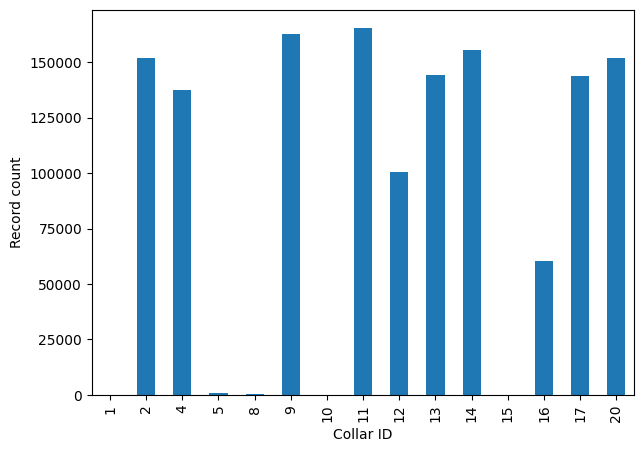

In [6]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))
fig, axs = plt.subplots(1, figsize=(7, 5))
plt.rcParams.update({'font.size': 18})
df['ID'].value_counts().sort_index().plot.bar(x='Target Value', y='Number of Occurrences')
plt.ylabel('Record count')
plt.xlabel('Collar ID')
plt.show()

In [7]:
df[(df.ID == ids[0])]

,timestamp,ID,S2,Dist,Pitch,Roll,Dx,Dy,Dz
timestamp,,,,,,,,,
2021-07-15 18:21:17,2021-07-15 18:21:17,1,X,262,-4,48,0,1,1
2021-07-15 18:21:17,2021-07-15 18:21:17,1,X,262,-4,48,0,1,1
2021-07-15 18:21:17,2021-07-15 18:21:17,1,X,262,-4,48,0,1,1
2021-07-15 18:21:17,2021-07-15 18:21:17,1,X,262,-4,48,0,1,1
2021-07-15 18:21:17,2021-07-15 18:21:17,1,X,262,-4,48,0,1,1
2021-07-15 18:24:48,2021-07-15 18:24:48,1,X,262,-14,27,0,0,1
2021-07-15 18:24:48,2021-07-15 18:24:48,1,X,262,-14,27,0,0,1
2021-07-15 18:24:48,2021-07-15 18:24:48,1,X,262,-14,27,0,0,1
2021-07-15 18:24:48,2021-07-15 18:24:48,1,X,262,-14,27,0,0,1


In [8]:
df.drop(df.index[df['ID'] == 1], inplace=True)
df.drop(df.index[df['ID'] == 5], inplace=True)
df.drop(df.index[df['ID'] == 8], inplace=True)
df.drop(df.index[df['ID'] == 10], inplace=True)
df.drop(df.index[df['ID'] == 15], inplace=True)

<IPython.core.display.Javascript object>

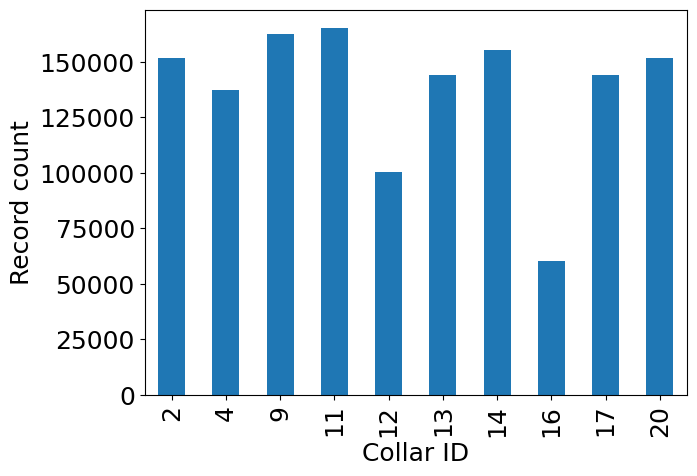

In [9]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))
fig, axs = plt.subplots(1, figsize=(7, 5))
plt.rcParams.update({'font.size': 18})
df['ID'].value_counts().sort_index().plot.bar(x='Target Value', y='Number of Occurrences')
plt.ylabel('Record count')
plt.xlabel('Collar ID')
plt.show()

In [10]:
ids = list(df['ID'].unique())
ids.sort()
print(f'IDs: {ids} ({len(ids)})')

IDs: [2, 4, 9, 11, 12, 13, 14, 16, 17, 20] (10)


In [11]:
df['act'] = df.apply(lambda row: math.sqrt(row.Dx**2 + row.Dy**2 + row.Dz**2), axis=1)

In [12]:
def numpy_ewma_vectorized_v2(data, window):

    alpha = 2 /(window + 1.0)
    alpha_rev = 1-alpha
    n = data.shape[0]

    pows = alpha_rev**(np.arange(n+1))

    scale_arr = 1/pows[:-1]
    offset = data[0]*pows[1:]
    pw0 = alpha*alpha_rev**(n-1)

    mult = data*pw0*scale_arr
    cumsums = mult.cumsum()
    out = offset + cumsums*scale_arr[::-1]
    return out

<IPython.core.display.Javascript object>

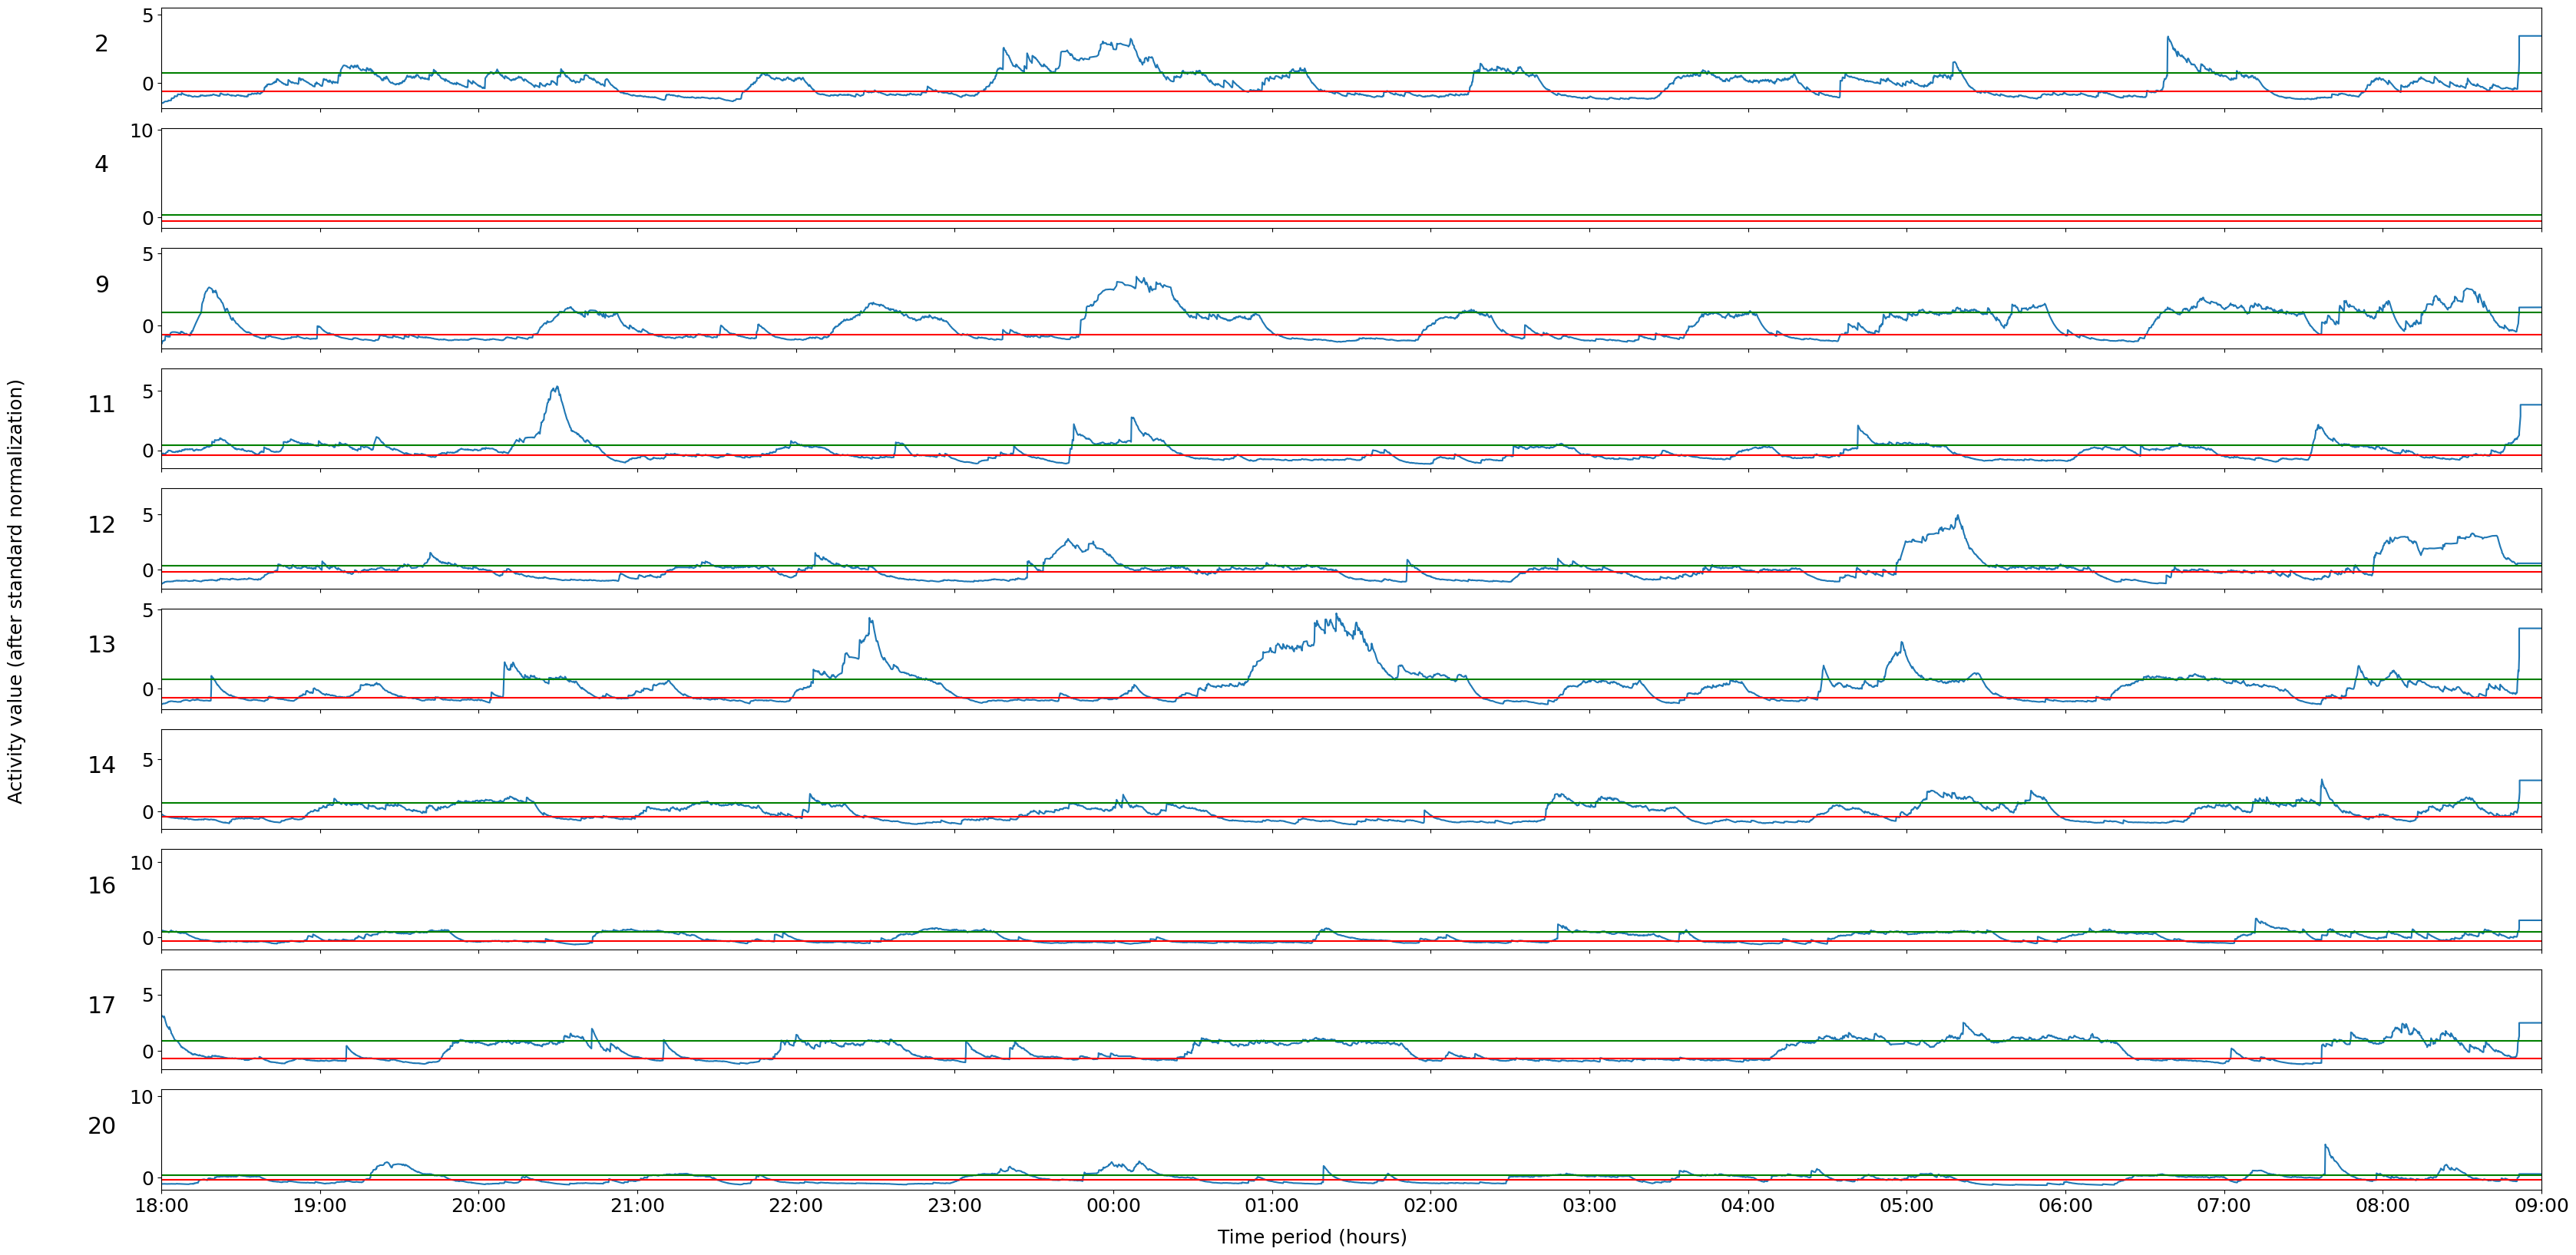

In [13]:
plt.rcParams.update({'font.size': 18})
scaler = preprocessing.StandardScaler()

df_day = df.loc['2021-12-05 18h00':'2021-12-07']

display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))
fig, axs = plt.subplots(len(ids), figsize=(40, 20), sharex=True)

datefmt = mdates.DateFormatter('%H:%M')

# for some reason the date added one day

start = datetime.datetime(2021,12, 5, 18, 0)
end   = datetime.datetime(2021,12, 6, 9, 0)

for i in range(len(ids)):
  id = ids[i]

  x = df_day[(df_day.ID == id)].index.values
  
  y = df_day[(df_day.ID == id)]['act'].values
  y = numpy_ewma_vectorized_v2(y, window=50)
  y = scaler.fit_transform(y.reshape(-1,1))

  #axs[i].set_yscale('log')
  axs[i].plot(x, y, label='ACT')

  q2 = np.quantile(y, .4)
  q3 = np.quantile(y, .8)

  axs[i].axhline(y=q2, color = 'red')
  axs[i].axhline(y=q3, color = 'green')

  axs[i].xaxis.set_major_locator(mdates.HourLocator(interval=1))
  axs[i].xaxis.set_major_formatter(datefmt)

  axs[i].set_xlim([start, end])

  axs[i].set_title(id, x=-.025, y=.5)
#axs[-1].set_xlabel('Time period (hours)')

fig.text(0.5, 0.075, 'Time period (hours)', ha='center')
fig.text(0.075, 0.5, 'Activity value (after standard normalization)', va='center', rotation='vertical')

plt.show()

<IPython.core.display.Javascript object>

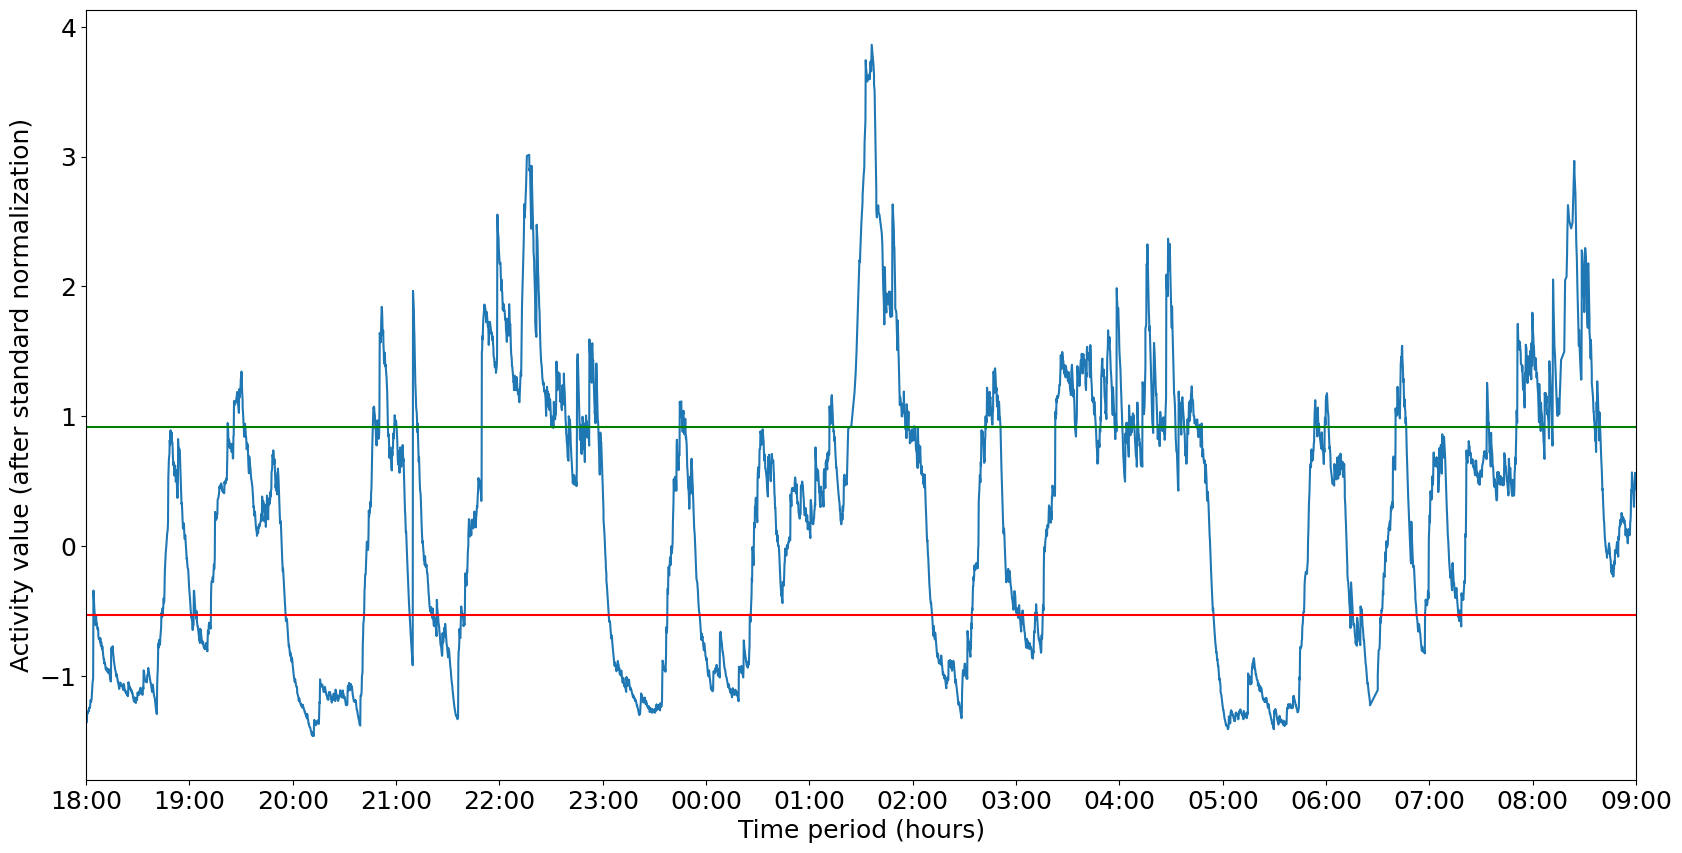

In [14]:
plt.rcParams.update({'font.size': 18})
scaler = preprocessing.StandardScaler()

df_day = df.loc['2021-12-03 18h00':'2021-12-04']

display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))
fig, ax = plt.subplots(1, figsize=(20, 10), sharex=True)

datefmt = mdates.DateFormatter('%H:%M')

# for some reason the date added one day

start = datetime.datetime(2021, 12, 3, 18, 0)
end   = datetime.datetime(2021, 12, 4, 9, 0)


id = ids[0]

x = df_day[(df_day.ID == id)].index.values

y = df_day[(df_day.ID == id)]['act'].values
y = numpy_ewma_vectorized_v2(y, window=50)
y = scaler.fit_transform(y.reshape(-1,1))

#axs[i].set_yscale('log')
ax.plot(x, y, label='ACT')

q2 = np.quantile(y, .4)
q3 = np.quantile(y, .8)

ax.axhline(y=q2, color = 'red')
ax.axhline(y=q3, color = 'green')

ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax.xaxis.set_major_formatter(datefmt)

ax.set_xlim([start, end])

ax.set_xlabel('Time period (hours)')
ax.set_ylabel('Activity value (after standard normalization)')

plt.show()

# Dataset analysis

In [15]:
# Create the Rolling Dataframe

scaler = preprocessing.StandardScaler()

rolling_dataframes = {}

tmp_list=[0]

# For each sheep
for i in tqdm(range(len(ids))):
#for i in tqdm(tmp_list):
  id = ids[i]
  df_sheep = df.loc[df['ID'] == id]
  rolling_dataframes[id] = []

  start_date = df_sheep.index.min()
  end_date = df_sheep.index.max()

  #start_date = datetime.datetime(2021,12, 7, 18, 0)
  #end_date   = datetime.datetime(2021,12, 8, 9, 0)

  #print(f'{id} [{start_date} {end_date}]')

  begin = start_date
  end = datetime.datetime(begin.year, begin.month, begin.day+1, 9, 0)

  # For each Night
  while end <= end_date:
    mask = (df['timestamp'] > begin) & (df['timestamp'] <= end)
    df_sheep_night = df.loc[mask]

    begin = begin + datetime.timedelta(days=1)
    end = end + datetime.timedelta(days=1)

    df_results = pd.DataFrame()

    df_results['act_5'] = df_sheep_night['act'].ewm(span=50, adjust=False).mean()
    df_results['dist_5'] = df_sheep_night['Dist'].ewm(span=50, adjust=False).mean()
    df_results['roll_5'] = df_sheep_night['Roll'].rolling(50).mean()

    if not df_results.empty:
      y =  df_results['act_5'].values
      df_results['act_5'] = scaler.fit_transform(y.reshape(-1,1))
      rolling_dataframes[id].append(df_results)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.97s/it]


In [16]:
# Create the State Dataframe

state_dataframe = {}

# For each sheep
for i in tqdm(range(len(ids))):
#for i in tqdm(tmp_list):
  id = ids[i]
  state_dataframe[id] = []

  nights = rolling_dataframes[id]
  for night in nights:
    t_sleep = np.quantile(night['act_5'], .4)
    t_active = np.quantile(night['act_5'], .8)
    df_results = pd.DataFrame()
    df_results['state'] = night.apply(lambda row: 'sleep' if row.act_5 <= t_sleep else 'active' if row.act_5 >= t_active else 'noise', axis=1)
    df_results['side'] = night.apply(lambda row: 'right' if row.roll_5 >=10  else 'left' if row.roll_5 <-10 else 'center', axis=1)
    if not df_results.empty:
      state_dataframe[id].append(df_results)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [08:01<00:00, 48.16s/it]


In [17]:
# Smooth the State Dataframe

HW = 100

for i in tqdm(range(len(ids))):
#for i in tqdm(tmp_list):
  id = ids[i]
  nights = state_dataframe[id]
  for night in nights:
    state = night['state'].to_list()

    for i in range(HW, len(state)-HW):
      window = state[i-HW:i+HW]
      if window[0] == window[-1]:
        state[i-HW:i+HW] = [window[0]]*(2*HW)
    night['state'] = state

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:29<00:00,  2.90s/it]


In [18]:
# Get the stats from the state

sleep_time = {}
active_time = {}
get_up = {}
sleep_side = {}

for i in tqdm(range(len(ids))):
#for i in tqdm(tmp_list):
  id = ids[i]
  nights = state_dataframe[id]

  # create the empty list for each sheep
  sleep_time[id] = []
  active_time[id] = []
  get_up[id] = []
  sleep_side[id] = {'left':[],'center':[],'right':[]}

  for night in nights:
    night_get_up = 0
    side_left = 0
    side_center = 0
    side_right = 0
    
    state = night['state'].to_list()
    side = night['side'].to_list()
    timestamp = night.index.to_list()
    
    sleep_idx = 0
    active_idx = 0

    # skip all until the first sleep state
    for idx in range(0, len(state)):
      if state[idx] == 'sleep':
        break
    
    tmp_side = []
    
    for j in range(idx+1,len(state)):
      if state[j-1] == state[j]:
          # same state
          if state[j] == 'sleep':
            
            side_duration = (timestamp[j] - timestamp[j-1]).total_seconds() / 60
            if side[j] == 'left':
              side_left += side_duration
              tmp_side.append('left')
            elif side[j] == 'right':
              side_right += side_duration
              tmp_side.append('right')
            else:
              tmp_side.append('center')
              side_center += side_duration
            
            if sleep_idx == 0:
              sleep_idx = j
          
          if state[j] == 'active' and active_idx == 0:
            active_idx = j
      else:
          # change state
          if state[j-1] == 'sleep':
            duration = (timestamp[j] - timestamp[sleep_idx]).total_seconds() / 60
            sleep_time[id].append(duration)
            night_get_up += 1
          if state[j-1] == 'active':
            duration = (timestamp[j] - timestamp[active_idx]).total_seconds() / 60
            active_time[id].append(duration)
          sleep_idx = 0
          active_idx = 0
    get_up[id].append(night_get_up)
    sleep_side[id]['left'].append(side_left)
    sleep_side[id]['center'].append(side_center)
    sleep_side[id]['right'].append(side_right)
    #print(f'Left {tmp_side.count("left")} Center {tmp_side.count("center")} Right {tmp_side.count("right")}')
    #print(f'{sleep_side[id]["left"][-1]} {sleep_side[id]["center"][-1]} {sleep_side[id]["right"][-1]}')

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.50s/it]


In [19]:
print(f' ID |      sleep     |      active')

for i in range(len(ids)):
#for i in tmp_list:
  id = ids[i]
  sheep_sleep_time = sleep_time[id]
  sleep_duration_median = statistics.median(sheep_sleep_time)
  
  sheep_active_time = active_time[id]
  active_duration_median = statistics.median(sheep_active_time)

  mad_sleep = statistics.median([abs(number-sleep_duration_median) for number in sheep_sleep_time])
  mad_active = statistics.median([abs(number-active_duration_median) for number in sheep_active_time])

  print(f'{id:>3} | {round(sleep_duration_median, 2):>4} ± {round(mad_sleep,2):>6} | {round(active_duration_median, 2):>4} ± {round(mad_active, 2):>6} ')

 ID |      sleep     |      active
  2 | 39.32 ±  19.32 | 26.97 ±  17.13 
  4 | 40.07 ±  20.07 | 29.98 ±  16.66 
  9 | 38.65 ±  18.83 | 28.82 ±  17.48 
 11 | 38.14 ±  19.41 | 28.73 ±  17.66 
 12 | 38.65 ±  19.17 | 29.4 ±  17.98 
 13 | 39.31 ±  19.82 | 30.82 ±  16.65 
 14 | 41.15 ±  20.33 | 29.65 ±  16.15 
 16 | 39.89 ±  19.65 | 34.82 ±  19.82 
 17 | 40.32 ±  18.66 | 28.48 ±  17.15 
 20 | 40.32 ±  18.66 | 28.48 ±  17.15 


In [20]:
print(f' ID | get-up')

for i in range(len(ids)):
#for i in tmp_list:
  id = ids[i]
  sheep_get_up = get_up[id]
  sheep_get_up_median = statistics.median(sheep_get_up)
  mad_get_up = statistics.median([abs(number-sheep_get_up_median) for number in sheep_get_up])
  
  print(f'{id:>3} | {round(sheep_get_up_median, 2):<3} ± {round(mad_get_up,2):<3}')

 ID | get-up
  2 | 5.5 ± 2.5
  4 | 6   ± 2  
  9 | 8.0 ± 3.0
 11 | 8.0 ± 3.0
 12 | 8.0 ± 3.0
 13 | 8.0 ± 3.0
 14 | 6   ± 2  
 16 | 6   ± 1  
 17 | 7.0 ± 1.0
 20 | 7.0 ± 1.0


In [21]:
print(f' ID |     left   center    right')

for i in range(len(ids)):
#for i in tmp_list:
  id = ids[i]
  side_left = np.sum(sleep_side[id]['left'])
  side_center = np.sum(sleep_side[id]['center'])
  side_right = np.sum(sleep_side[id]['right'])
  print(f'{id:>3} | {round(side_left, 2):>8} {round(side_center,2):>8} {round(side_right, 2):>8}')

 ID |     left   center    right
  2 |  3659.42 10091.07    22.18
  4 |  2300.43 12339.55   757.67
  9 |  4665.13 15279.47    29.18
 11 |  4648.53  14938.3    29.18
 12 |  4611.43 14833.42    29.18
 13 |  4799.48 15721.55    37.32
 14 |  2288.48 12190.83   757.67
 16 |   814.17  3072.68      6.0
 17 |   2965.9  8278.57    21.32
 20 |   2965.9  8278.57    21.32


## Plot Activity per night

In [22]:
scaler = preprocessing.StandardScaler()

# Select the relevant day
df_day = df.loc['2021-12-05 18h00':'2021-12-07']

# Create the Rolling Dataframe
rolling_dataframes = {}

for i in tqdm(range(len(ids))):
  id = ids[i]
  df_sheep_night = df_day.loc[df_day['ID'] == id]
  df_rolling = pd.DataFrame()
  df_rolling['act_5'] = df_sheep_night['act'].ewm(span=50, adjust=False).mean()
  y =  df_rolling['act_5'].values
  df_rolling['act_5'] = scaler.fit_transform(y.reshape(-1,1))
  rolling_dataframes[id] = df_rolling

# Create the State Dataframe
state_dataframe = {}

for i in tqdm(range(len(ids))):
  id = ids[i]

  night = rolling_dataframes[id]
  
  t_sleep = np.quantile(night['act_5'], .4)
  t_active = np.quantile(night['act_5'], .8)
  df_results = pd.DataFrame()
  df_results['state'] = night.apply(lambda row: 'sleep' if row.act_5 <= t_sleep else 'active' if row.act_5 >= t_active else 'noise', axis=1)
  state_dataframe[id] = df_results


# Smooth the State Dataframe

HW = 15

for i in tqdm(range(len(ids))):
#for i in tqdm(tmp_list):
  id = ids[i]
  night = state_dataframe[id]
  state = night['state'].to_list()
  for i in range(HW, len(state)-HW):
    window = state[i-HW:i+HW]
    if window[0] == window[-1]:
      state[i-HW:i+HW] = [window[0]]*(2*HW)
  night['state'] = state


data = np.zeros((10, 60))

# Gather the stats for plotting
for i in tqdm(range(len(ids))):
  id = ids[i]
  df_sheep_night = state_dataframe[id]

  df_sheep_night.reset_index(inplace=True)
  df_sheep_night = df_sheep_night.rename(columns = {'index':'timestamp'})

  begin = datetime.datetime(2021, 12, 5, 18, 0)
  end_date  = datetime.datetime(2021, 12, 6, 9, 0)
  end = begin + datetime.timedelta(minutes=15)

  for j in range(60):
    sleep = 0
    active = 0
    half_active = 0
    
    mask = (df_sheep_night['timestamp'] > begin) & (df_sheep_night['timestamp'] <= end)
    df_sheep_night_hour = df_sheep_night.loc[mask]
    states = df_sheep_night_hour['state'].to_list()
    timestamps = df_sheep_night_hour['timestamp'].to_list()
    
    for k in range(1, len(states)):
      duration = (timestamps[k]-timestamps[k-1]).total_seconds() / 60
      if states[k] == 'active':
        active += duration
      elif states[k] == 'sleep':
        sleep += duration
      else:
        half_active += duration

    if sleep > active and sleep > half_active:
      data[i][j] = 0.0
    elif active > sleep and active > half_active:
      data[i][j] = 1.0
    else:
      data[i][j] = 0.5
    
    #if (active+half_active+sleep) == 0:
    #  data[i][j] = 0.5
    #else:
    #  data[i][j] = active/(active+half_active+sleep)
    
    end = end + datetime.timedelta(minutes=15)


# Generate the times for the plot
begin = datetime.datetime(2021, 12, 5, 18, 0)
times = []
for j in range(60):
  times.append(begin.strftime('%H:%M'))
  begin = begin + datetime.timedelta(minutes=15)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:06<00:00,  1.56it/s]


<IPython.core.display.Javascript object>

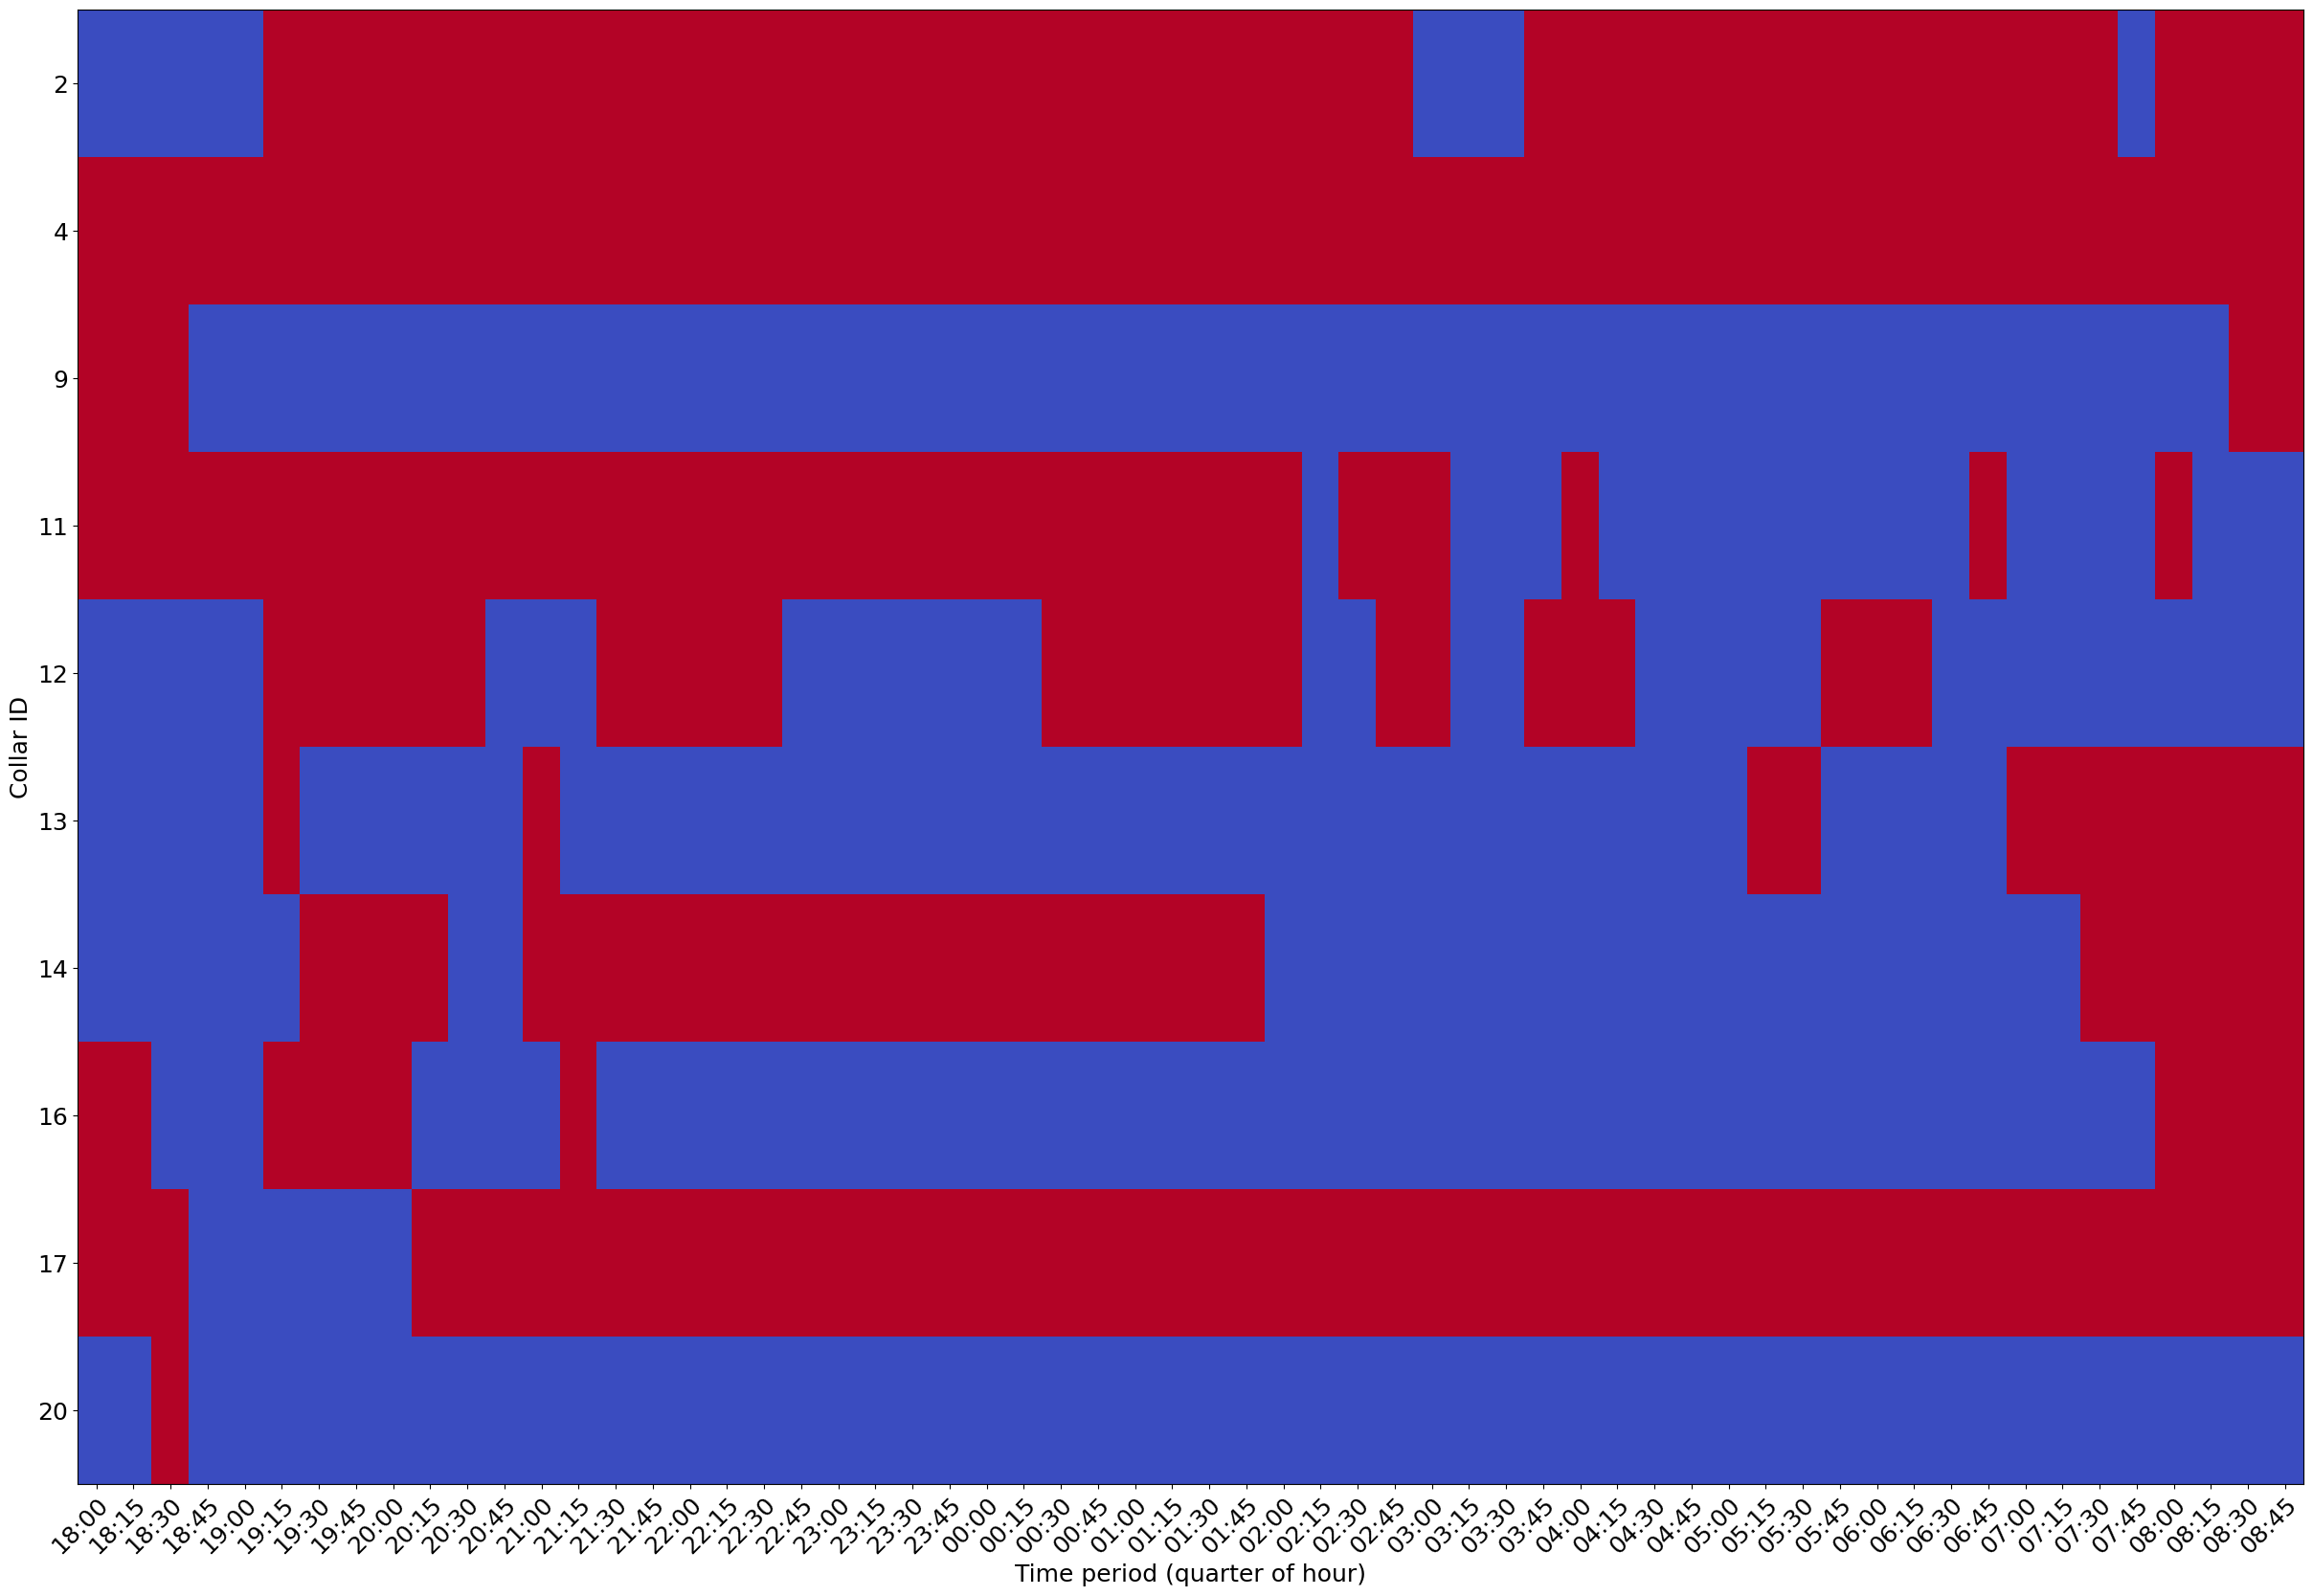

In [23]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))
fig, ax = plt.subplots(1, figsize=(30, 20), sharex=True)

ax.imshow(data, cmap='coolwarm', aspect='auto')

# Show all ticks and label them with the respective list entries
ax.set_yticks(np.arange(len(ids)))
ax.set_xticks(np.arange(len(times)))
ax.set_yticklabels(ids)
ax.set_xticklabels(times)
ax.set_xlabel('Time period (quarter of hour)')
ax.set_ylabel('Collar ID')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.show()

## Debug visualisation

<IPython.core.display.Javascript object>

KeyError: 0

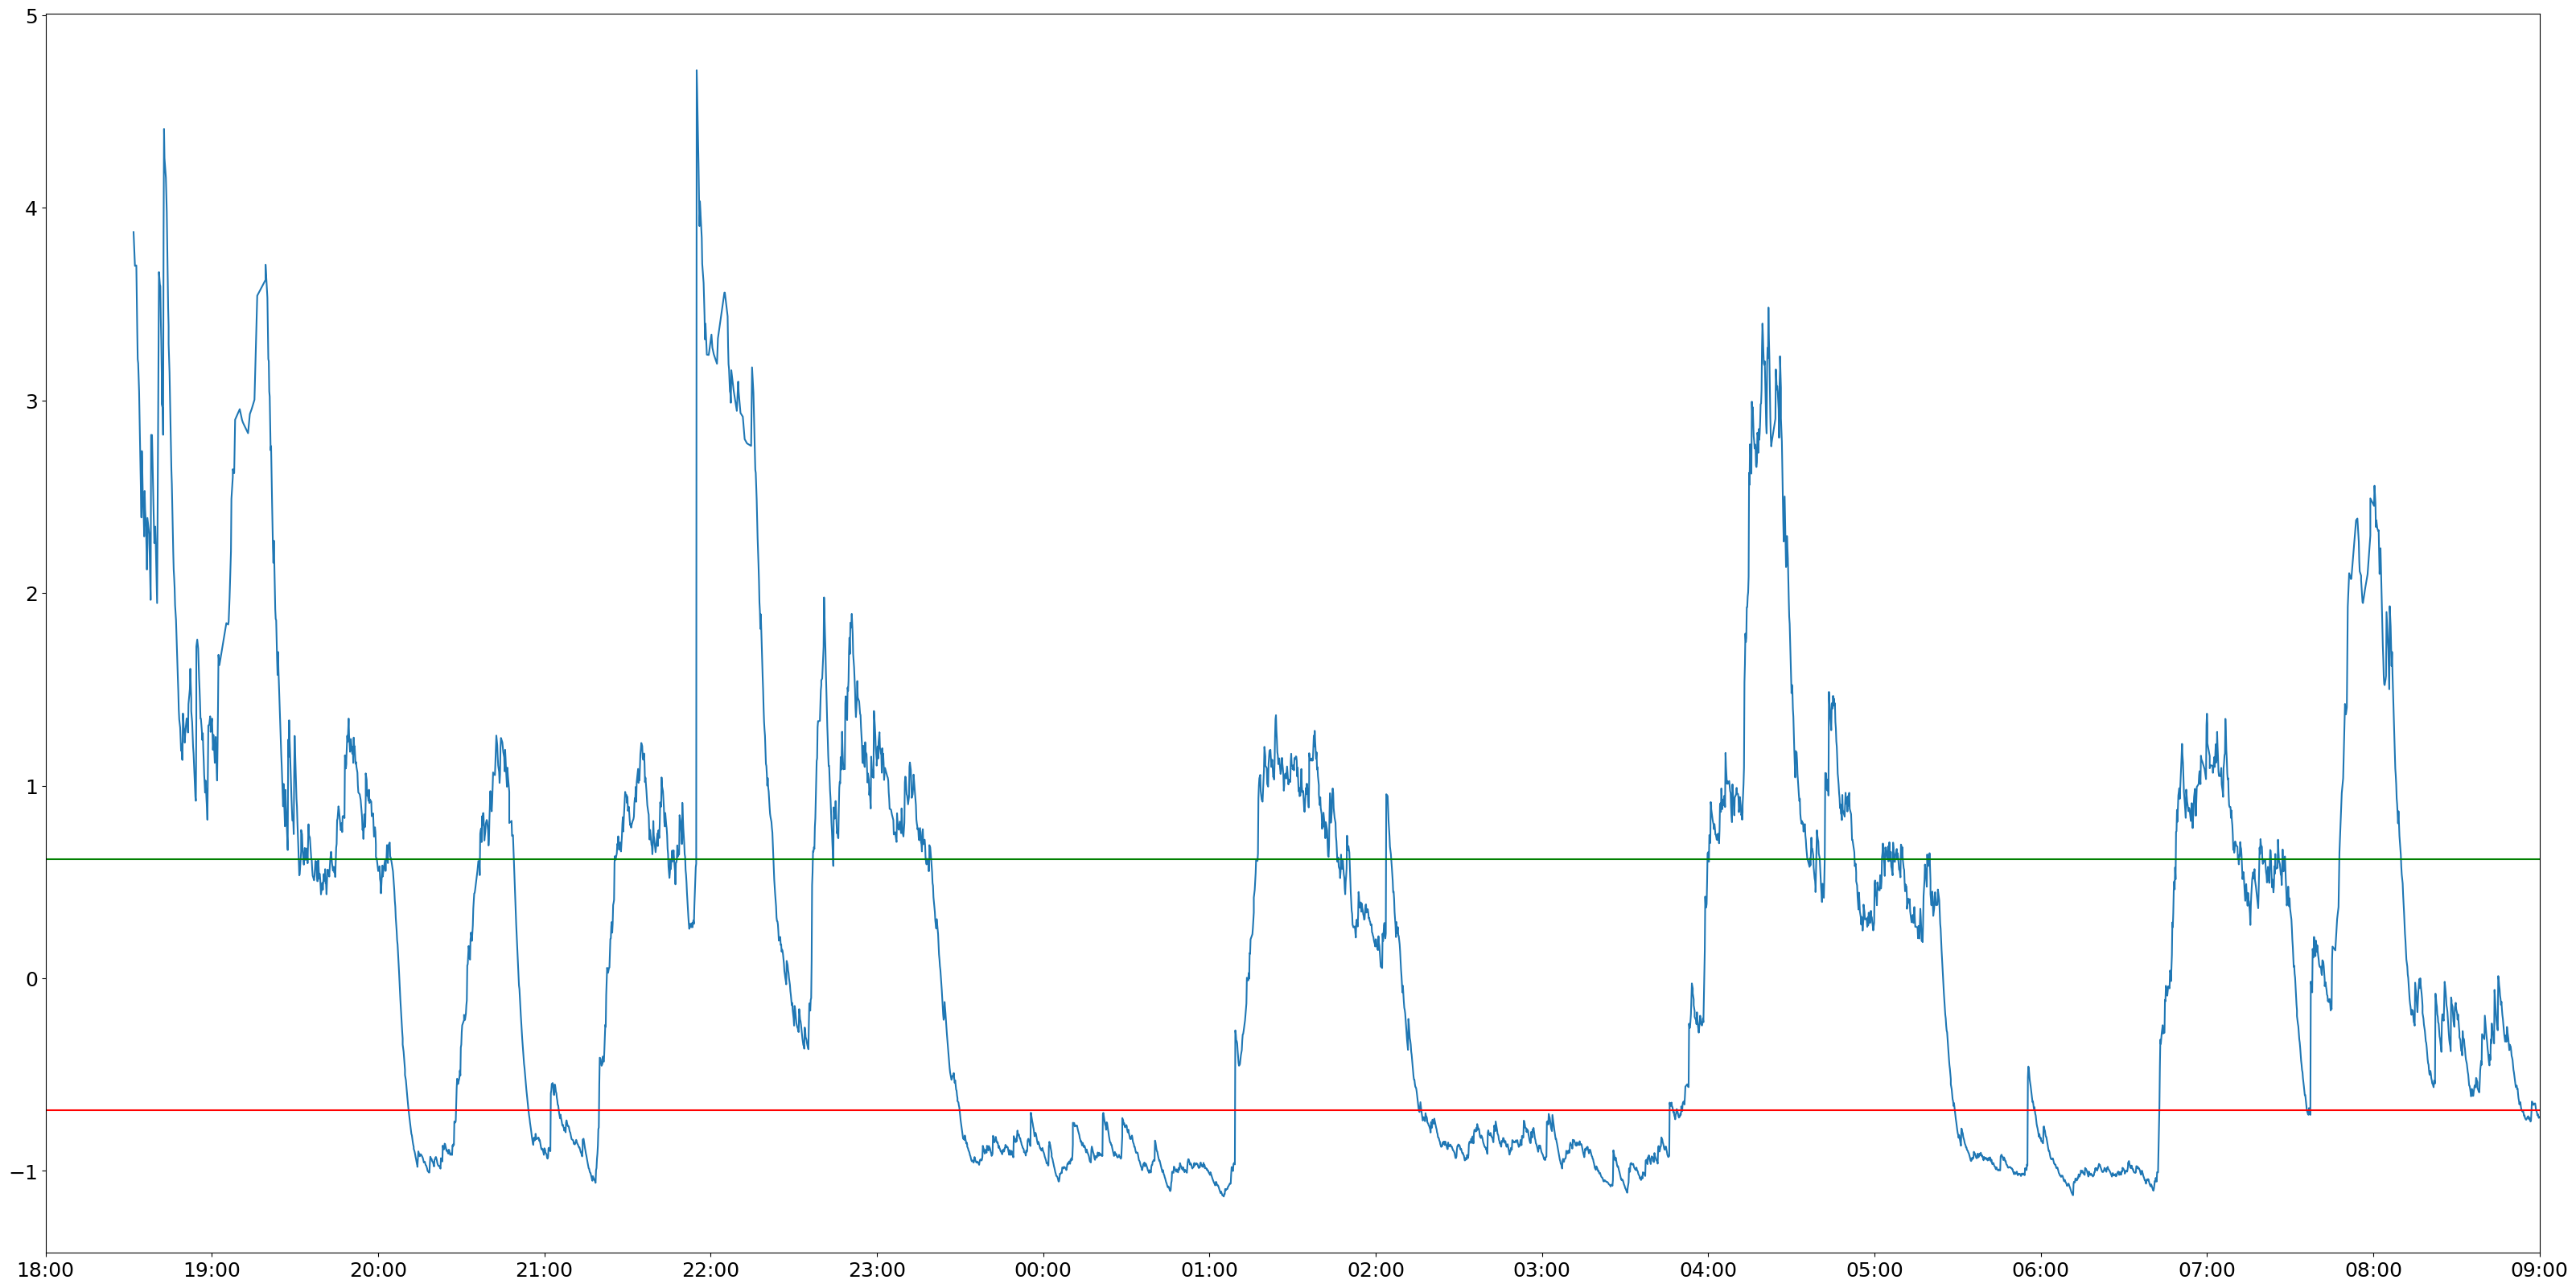

In [24]:
# Plot data for debug
plt.rcParams.update({'font.size': 18})
scaler = preprocessing.StandardScaler()

df_day = df.loc['2021-12-06 18h00':'2021-12-08']

display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))
fig, ax = plt.subplots(1, figsize=(40, 20), sharex=True)

datefmt = mdates.DateFormatter('%H:%M')

# for some reason the date added one day

start = datetime.datetime(2021,12, 7, 18, 0)
end   = datetime.datetime(2021,12, 8, 9, 0)


id = ids[0]

x = df_day[(df_day.ID == id)].index.values

y = df_day[(df_day.ID == id)]['act'].values
y = numpy_ewma_vectorized_v2(y, window=50)
y = scaler.fit_transform(y.reshape(-1,1))

#axs[i].set_yscale('log')
ax.plot(x, y, label='ACT')

q2 = np.quantile(y, .4)
q3 = np.quantile(y, .75)

ax.axhline(y=q2, color = 'red')
ax.axhline(y=q3, color = 'green')

ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax.xaxis.set_major_formatter(datefmt)

ax.set_xlim([start, end])

debug_dataframe = state_dataframe[2][0]

debug_dataframe['state_plot'] = debug_dataframe.apply(lambda row: 0 if row.state == 'sleep' else 2 if row.state == 'active' else 1, axis=1)
debug_dataframe.plot(kind='line', y='state_plot', use_index=True, figsize=(40, 20))
plt.show()